In [1]:
import os
import platform
import sys
from os.path import dirname, realpath

import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# from matplotlib import colors
# import matplotlib
# matplotlib.use('QtAgg')
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import itertools
import tifffile as tif
import pandas as pd
import seaborn as sns
from pathlib import Path
import glob
from tqdm import tqdm
from scipy import signal
import scipy.io as sio
from scipy.ndimage import gaussian_filter
import imageio
import argparse
from configparser import ConfigParser
#import napari
import dlc2kinematics
# from pygifsicle import optimize
from get_list_data import expt1_data_list
from helper import *


data_root = '/media/user/teamshare/nick/behavior/grooming/1p/'    
data_list = expt1_data_list

# %%

In [31]:

for expt in tqdm(data_list):
    mouse_id, list_rec_dir = expt
    # if mouse id to process is passed, process only that mouse
    out_dir = data_root + os.sep + mouse_id +  os.sep + "outputs"
    set_path(out_dir)

    pp = PdfPages(out_dir + os.sep + 'paw_tracks.pdf')

    for rec_dir in tqdm(list_rec_dir):
        #if recording dir idc is passed, process only that dir
        try:
            dlc_file = glob.glob(data_root + os.sep + mouse_id + os.sep + rec_dir + os.sep + mouse_id + '_' + rec_dir + '*1030000.csv')[0]
        except:
            print('DLC csv missing ', mouse_id + os.sep + rec_dir, ' continue to next')
            continue

        df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)            
        fllx = df_dlc['fll'][1:].to_numpy().astype(np.float32)
        flly = df_dlc['fll.1'][1:].to_numpy().astype(np.float32)
        fllp = df_dlc['fll.2'][1:].to_numpy().astype(np.float32)
        idx = fllp<0.9

        fllx[idx] = np.nan
        flly[idx] = np.nan

        flrx = df_dlc['flr'][1:].to_numpy().astype(np.float32)
        flry = df_dlc['flr.1'][1:].to_numpy().astype(np.float32)
        flrp = df_dlc['flr.2'][1:].to_numpy().astype(np.float32)
        idx = flrp<0.9

        flrx[idx] = np.nan
        flry[idx] = np.nan

        nosex = df_dlc['nose'][1:].to_numpy().astype(np.float32)
        nosey = df_dlc['nose.1'][1:].to_numpy().astype(np.float32)
        nosep = df_dlc['nose.2'][1:].to_numpy().astype(np.float32)
        idx = nosep<.9

        nosex[idx] = np.nan
        nosey[idx] = np.nan
               
        fig = plt.figure()

        plt.plot(fllx, -flly, alpha=0.5, label='FL L', linewidth=0.5)
        plt.plot(flrx, -flry, alpha=0.5, label='FL R', linewidth=0.5)
        plt.plot(nosex, -nosey, alpha=0.5, label='Nose', linewidth=0.5)
        plt.title(mouse_id + "_" + rec_dir)
        plt.axis('off')
        plt.legend()
        pp.savefig(fig)
        plt.close()
    pp.close()

  0%|                                                                                                                                                                                  | 0/6 [00:00<?, ?it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 17%|████████████████████████████▎                                                                                                                                             | 1/6 [00:00<00:03,  1.32it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 33%|████████████████████████████████████████████████████████▋                                                                                                          

DLC csv missing  HYL3_tTA/20231120043753  continue to next



  0%|                                                                                                                                                                                  | 0/6 [00:00<?, ?it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 17%|████████████████████████████▎                                                                                                                                             | 1/6 [00:00<00:03,  1.44it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 33%|████████████████████████████████████████████████████████▋                                                                                                         

DLC csv missing  IBL2_tTA/20231120033323  continue to next



  0%|                                                                                                                                                                                  | 0/6 [00:00<?, ?it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 17%|████████████████████████████▎                                                                                                                                             | 1/6 [00:00<00:03,  1.63it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 33%|████████████████████████████████████████████████████████▋                                                                                                         

DLC csv missing  HYR3_tTA/20231120040417  continue to next



  0%|                                                                                                                                                                                  | 0/7 [00:00<?, ?it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 14%|████████████████████████▎                                                                                                                                                 | 1/7 [00:00<00:03,  1.53it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 29%|████████████████████████████████████████████████▌                                                                                                                 

DLC csv missing  GER2_ai94/20231120025554  continue to next



  0%|                                                                                                                                                                                  | 0/6 [00:00<?, ?it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 17%|████████████████████████████▎                                                                                                                                             | 1/6 [00:00<00:04,  1.00it/s]/tmp/ipykernel_18905/2560179192.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dlc = pd.read_csv(dlc_file, header=0, skiprows=1)

 33%|████████████████████████████████████████████████████████▋                                                                                                         

DLC csv missing  ECR2_thy1/20231120051613  continue to next



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 273.35it/s]
/tmp/ipykernel_18905/2560179192.py:52: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  pp.close()
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:17<00:00,  2.94s/it]

DLC csv missing  ETL2_thy1/20231111151220  continue to next


In [3]:
fllx

array([341.4991 , 341.39026, 341.30054, ..., 327.63568, 327.62378,
       327.59708], dtype=float32)

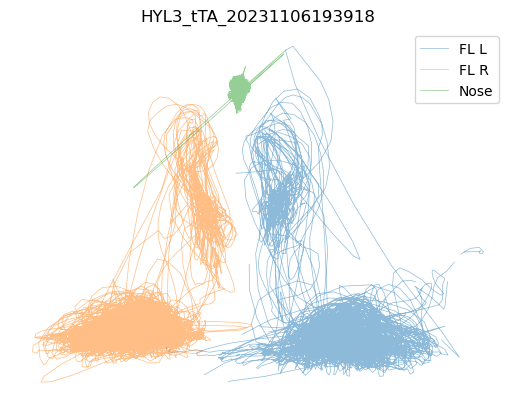

In [12]:
%matplotlib inline
plt.figure(), 
plt.plot(fllx, -flly, alpha=0.5, label='FL L', linewidth=0.5)
plt.plot(flrx, -flry, alpha=0.5, label='FL R', linewidth=0.5)
plt.plot(nosex, -nosey, alpha=0.5, label='Nose', linewidth=0.5)
plt.title(mouse_id + "_" + rec_dir)
plt.axis('off')
plt.legend()

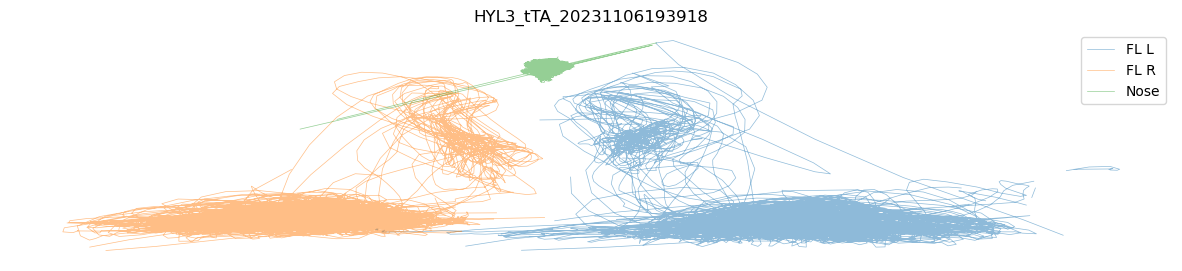

In [25]:
fig = plt.figure(figsize=(15, 3))
plt.plot(fllx, -flly, alpha=0.5, label='FL L', linewidth=0.5)
plt.plot(flrx, -flry, alpha=0.5, label='FL R', linewidth=0.5)
plt.plot(nosex, -nosey, alpha=0.5, label='Nose', linewidth=0.5)
plt.title(mouse_id + "_" + rec_dir)
plt.axis('off')
plt.legend()